In [26]:
import xarray as xr
import pandas as pd
import  matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans


In [27]:
#A brilliant explainer video for principle component analysis : https://www.youtube.com/watch?v=FgakZw6K1QQ

In [28]:
#Loading the  final data file
# the final file consists of  40 variables and 99 staddtteils

In [29]:
file_path = 'Data/final_data.csv'

# Load the CSV file into a pandas DataFrame
df_all_final_variables = pd.read_csv(file_path)

#Checking the file 
df_all_final_variables.head()


Unnamed: 0  Anzahl der Einwohner: innen  \
0  Hamburg-Altstadt                       3182.0   
1         HafenCity                       6950.0   
2          Neustadt                      12649.0   
3         St. Pauli                      22056.0   
4         St. Georg                      12318.0   

   Anzahl der Kinder und Jugendlichen unter 18 Jahren  \
0                                              515.0    
1                                             1386.0    
2                                             1412.0    
3                                             2941.0    
4                                             1420.0    

   Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung  \
0                                               16.2                          
1                                               19.9                          
2                                               11.2                          
3                                               13.3                          
4                                               11.5                          

   Anzahl älterer Einwohner: innen über 64 Jahren  \
0                                           316.0   
1                                           644.0   
2                                          1919.0   
3                                          2270.0   
4                                          1676.0   

   Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung  \
0                                                9.9                          
1                                                9.3                          
2                                               15.2                          
3                                               10.3                          
4                                               13.6                          

   Anzahl der Haushalte  Durch-schnittliche Anzahl der Personen je Haushalt  \
0                1884.0                                                1.7    
1                3183.0                                                2.2    
2                8683.0                                                1.5    
3               14772.0                                                1.5    
4                7720.0                                                1.6    

   Fläche in km²  Einwohner: innen je km²  ...  market_count  farms_count  \
0            1.3                   2447.0  ...             2            0   
1            2.4                   2865.0  ...             1            0   
2            2.3                   5592.0  ...             1            0   
3            2.2                   9836.0  ...             1            0   
4            1.8                   6758.0  ...             2            0   

   greencrocers_count  supermarkets_count  biosupermarkets_count  \
0                   1                   4                      0   
1                   0                   6                      1   
2                   2                   6                      1   
3                   1                  10                      0   
4                   0                  11                      0   

   all_restaurants_count  organic_restaurants_count  vegan_restaurants_count  \
0                    129                          0                        4   
1                     56                          3                        1   
2                    140                          4                        4   
3                    109                          1                        2   
4                     80                          2                        4   

   art_score  distance_rathaus  
0   2.565476          0.000000  
1   1.952381          0.005758  
2   2.702381          0.001174  
3   1.851190          0.009631  
4   2.523810          0.008493  

[5 rows x 40 columns]

In [30]:
#+ Dropping the art_score variableas we are only looking at original data based dimensions and the exercise involves figuring outlinear combinations

In [31]:
# Rename the "Unnamed: 0" column to "Staddteils"
df_all_final_variables.rename(columns={'Unnamed: 0': 'Stadtteils'}, inplace=True)

# Specify the column you want to drop
column_to_drop = 'art_score'

# Drop the specified column
df_all_final_variables.drop(column_to_drop, axis=1, inplace=True)

# Write the modified DataFrame to a new CSV file
df_all_final_variables.to_csv('final_data_file_without_art_score.csv', index=False)

In [32]:
#Loading the new csv file  to  carry out principle component analysis

In [33]:
file_path = 'final_data_file_without_art_score.csv'

# Load the CSV file into a pandas DataFrame
df_all_final_variables = pd.read_csv(file_path)

#Checking the file 
df_all_final_variables.head()


Stadtteils  Anzahl der Einwohner: innen  \
0  Hamburg-Altstadt                       3182.0   
1         HafenCity                       6950.0   
2          Neustadt                      12649.0   
3         St. Pauli                      22056.0   
4         St. Georg                      12318.0   

   Anzahl der Kinder und Jugendlichen unter 18 Jahren  \
0                                              515.0    
1                                             1386.0    
2                                             1412.0    
3                                             2941.0    
4                                             1420.0    

   Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung  \
0                                               16.2                          
1                                               19.9                          
2                                               11.2                          
3                                               13.3                          
4                                               11.5                          

   Anzahl älterer Einwohner: innen über 64 Jahren  \
0                                           316.0   
1                                           644.0   
2                                          1919.0   
3                                          2270.0   
4                                          1676.0   

   Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung  \
0                                                9.9                          
1                                                9.3                          
2                                               15.2                          
3                                               10.3                          
4                                               13.6                          

   Anzahl der Haushalte  Durch-schnittliche Anzahl der Personen je Haushalt  \
0                1884.0                                                1.7    
1                3183.0                                                2.2    
2                8683.0                                                1.5    
3               14772.0                                                1.5    
4                7720.0                                                1.6    

   Fläche in km²  Einwohner: innen je km²  ...  \
0            1.3                   2447.0  ...   
1            2.4                   2865.0  ...   
2            2.3                   5592.0  ...   
3            2.2                   9836.0  ...   
4            1.8                   6758.0  ...   

   Gesamtbetrag Einkünfte Median - [€]  market_count  farms_count  \
0                              10811.0             2            0   
1                              57913.0             1            0   
2                              24715.0             1            0   
3                              19399.0             1            0   
4                              27161.0             2            0   

   greencrocers_count  supermarkets_count  biosupermarkets_count  \
0                   1                   4                      0   
1                   0                   6                      1   
2                   2                   6                      1   
3                   1                  10                      0   
4                   0                  11                      0   

   all_restaurants_count  organic_restaurants_count  vegan_restaurants_count  \
0                    129                          0                        4   
1                     56                          3                        1   
2                    140                          4                        4   
3                    109                          1                        2   
4                     80                          2                        4   

   

In [34]:
# Listing out all variables for clarity

In [35]:
df_all_final_variables.columns

Index(['Stadtteils', 'Anzahl der Einwohner: innen',
       'Anzahl der Kinder und Jugendlichen unter 18 Jahren',
       'Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
       'Anzahl älterer Einwohner: innen über 64 Jahren',
       'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung',
       'Anzahl der Haushalte',
       'Durch-schnittliche Anzahl der Personen je Haushalt', 'Fläche in km²',
       'Einwohner: innen je km²',
       'Sozial-versicherungs-pflichtig Beschäftigte am Wohnort',
       'Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbs-fähigen (15 bis unter 65-Jährige)',
       'Anzahl der Arbeitslosen', 'Anzahl der Wohngebäude',
       'Anzahl der Wohnungen', 'Durch-schnittliche Wohnungs-größe in m²',
       'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
       'Anzahl der Sozial-wohnungen',
       'Anteil der Sozial-wohnungen an allen Wohnungen',
       'Durch-schnittlicher Immobilien-prei

In [36]:
df_all_final_variables.dropna(inplace=True)
# Separate the Stadtteils column (if it's not already separated)
stadtteils = df_all_final_variables['Stadtteils']
data = df_all_final_variables.drop('Stadtteils', axis=1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)




In [37]:
# Perform PCA
pca = PCA()
pca.fit(data_scaled)
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to keep based on explained variance
# For example, let's say you want to retain 95% of the variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()
n_components = (cumulative_variance_ratio < 0.95).sum() + 1

# Perform PCA with the determined number of components
pca = PCA(n_components=n_components)
pca.fit(data_scaled)

# Transform the data to the reduced dimensionality
data_reduced = pca.transform(data_scaled)

# Create a DataFrame for the reduced data
columns_reduced = [f'PC{i+1}' for i in range(n_components)]
df_reduced = pd.DataFrame(data_reduced, columns=columns_reduced)

df_reduced


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -1.847420 -4.736687 -1.237364  3.842498  1.054154 -3.448106  0.385933   
1  -3.252087 -2.932887  2.004005  4.821458 -0.354542  4.500812 -1.934975   
2   0.947173 -6.434422  1.110115  3.291274  3.772790  0.533044 -1.437409   
3   1.966300 -4.603407 -0.445040  1.947126 -0.024577 -0.834422  0.228598   
4  -0.050409 -5.094176  0.696103  2.991089  0.793640 -1.383921 -0.724327   
..       ...       ...       ...       ...       ...       ...       ...   
73 -3.747149  1.121353 -1.246832 -1.181183  1.273039 -0.413501  0.019987   
74 -0.320332  1.253374 -1.324008 -1.102529  0.661428  0.118388  0.063330   
75 -0.117930  0.059482 -3.046071  0.260260 -0.590122  0.659881 -0.162152   
76 -2.015779  1.630222 -2.416595  0.374969  0.600642  0.617563  0.181314   
77  0.672827  4.272292 -1.587523  0.956431  0.684020 -0.225692 -0.723498   

         PC8       PC9      PC10      PC11      PC12  
0  -1.153334  0.862161 -0.647208 -0.261230 -1.101637  
1   0.561121 -0.229783  1.938054 -1.329754  0.151135  
2  -2.264404 -0.858370 -0.223738  0.391836  0.549060  
3  -0.614249 -1.438723 -1.008346  0.049253 -0.309725  
4  -1.312445 -1.511837 -0.129467 -0.642074  0.453403  
..       ...       ...       ...       ...       ...  
73 -0.759782  0.040219 -0.011459 -0.014702  0.296500  
74 -0.737696  0.451648 -0.342333  0.254295 -0.350388  
75 -0.598371  0.126081  0.597931  0.493747 -0.386734  
76 -0.389098  0.803871 -0.185618  0.045234  0.093499  
77  0.659483  0.445128  0.572024  1.237028 -0.216124  

[78 rows x 12 columns]

pca.explained_variance_ratio_

In [38]:
pca.explained_variance_ratio_

array([0.35731217, 0.23920141, 0.14664168, 0.05794901, 0.03688085,
       0.02718378, 0.0225487 , 0.01877962, 0.01442807, 0.01366276,
       0.01098073, 0.00984094])

In [39]:
#Construction of scree plot: showinghowmuch variance in  the data is explained  by each of the PCs

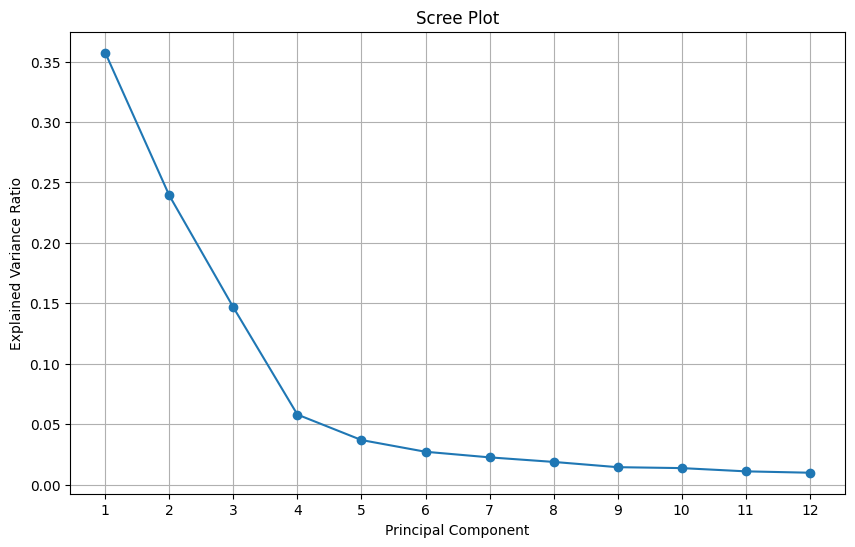

In [40]:

# Assuming pca is your PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


In [41]:
# Assuming pca is your PCA object

# Display loadings for PC1 to PC3
for i in range(3):  # Loop through PC1 to PC3
    pc_loadings = pca.components_[i]  # Loadings for the current principal component
    print(f'Loadings for PC{i+1}:')
    for j, loading in enumerate(pc_loadings):
        variable_name = data.columns[j]  # Assuming data is your DataFrame
        print(f'{variable_name}: {loading:.4f}')
    print()  # Empty line for better readability


Loadings for PC1:
Anzahl der Einwohner: innen: 0.2552
Anzahl der Kinder und Jugendlichen unter 18 Jahren: 0.2262
Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung: -0.1016
Anzahl älterer Einwohner: innen über 64 Jahren: 0.2140
Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung: -0.0823
Anzahl der Haushalte: 0.2649
Durch-schnittliche Anzahl der Personen je Haushalt: -0.1360
Fläche in km²: 0.0865
Einwohner: innen je km²: 0.1153
Sozial-versicherungs-pflichtig Beschäftigte am Wohnort: 0.2643
Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbs-fähigen (15 bis unter 65-Jährige): 0.1283
Anzahl der Arbeitslosen: 0.2373
Anzahl der Wohngebäude: 0.1489
Anzahl der Wohnungen: 0.2626
Durch-schnittliche Wohnungs-größe in m²: -0.1656
Durch-schnittliche Wohnfläche je Einwohner:in in m²: -0.1365
Anzahl der Sozial-wohnungen: 0.1870
Anteil der Sozial-wohnungen an allen Wohnungen: 0.0443
Durch-schnittlicher Immobilien-preis für ein Grun

In [42]:
# Displaying the top fiveloadings foreach PC

In [43]:

# Assuming pca is your PCA object

# Create a DataFrame to store the loadings for PC1 to PC3
loadings_df = pd.DataFrame(pca.components_[:3], columns=data.columns)

# Display the top 5 variables with the highest loadings for each PC
for i in range(3):  # Loop through PC1 to PC4
    pc_loadings = loadings_df.iloc[i]  # Loadings for the current principal component
    top_loadings = pc_loadings.abs().nlargest(5)  # Get the top 5 loadings (absolute values)
    print(f'Top 5 variables with highest loadings for PC{i+1}:')
    print(top_loadings)
    print()  # Empty line for better readability


Top 5 variables with highest loadings for PC1:
Anzahl der Haushalte                                      0.264860
Sozial-versicherungs-pflichtig Beschäftigte am Wohnort    0.264275
Anzahl der Wohnungen                                      0.262636
Anzahl der Einpersonen-haushalte                          0.261789
Gesamtbetrag der Einkünfte - [Steuerpflichtig]            0.259962
Name: 0, dtype: float64

Top 5 variables with highest loadings for PC2:
Anzahl der Wohnungen in Ein- und Zweifamilien-häusern                       0.280258
distance_rathaus                                                            0.267490
Anteil der Haushalte, in denen nur eine Person lebt, an allen Haushalten    0.263099
Durch-schnittliche Anzahl der Personen je Haushalt                          0.261222
Anzahl der Wohngebäude                                                      0.254367
Name: 1, dtype: float64

Top 5 variables with highest loadings for PC3:
Festgesetzte Einkommenssteuer/ Jahreslohnsteuer -

In [44]:
#Visualising top loadings in a bar plot for  four components : top 10 variables with the most weights for three principle components

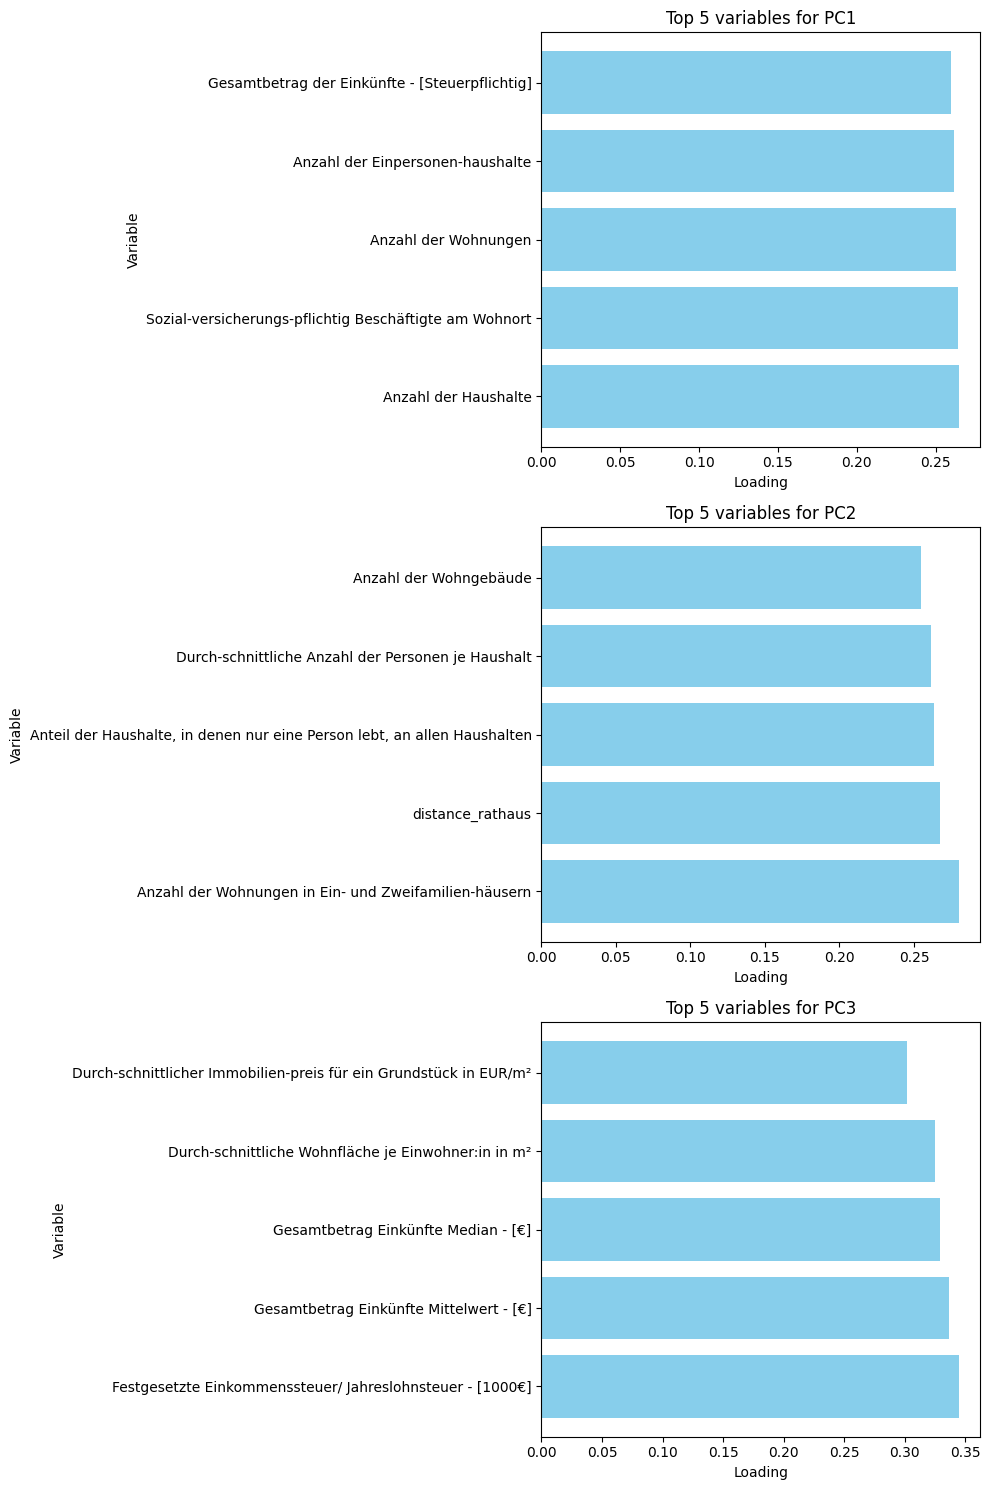

In [45]:

# Assuming pca is your PCA object

# Create a DataFrame to store the loadings for PC1 to PC3
loadings_df = pd.DataFrame(pca.components_[:3], columns=data.columns)

# Create a figure to plot the bar plots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over each principal component
for i in range(3):
    # Get the loadings for the current principal component
    pc_loadings = loadings_df.iloc[i]
    # Get the top 5 variables with the highest loadings
    top_loadings = pc_loadings.abs().nlargest(5)
    # Plot the bar plot for the current principal component
    ax = axes[i]
    ax.barh(top_loadings.index, top_loadings.values, color='skyblue')
    ax.set_title(f'Top 5 variables for PC{i+1}')
    ax.set_xlabel('Loading')
    ax.set_ylabel('Variable')

plt.tight_layout()
plt.show()


In [46]:
import pandas as pd

# File paths
file_path = '/Users/asthanashivanshi1992/project-version-2/final_data_file_without_art_score.csv'
file_path_column_medians = '/Users/asthanashivanshi1992/project-version-2/Codes/column_75th_percentiles.csv'

# Load the CSV files into pandas DataFrames
df_75 = pd.read_csv(file_path)
column_75_df = pd.read_csv(file_path_column_medians)

# Specify the relevant variables for calculation
relevant_variables = [
    'Anzahl der Haushalte',
    'Sozial-versicherungs-pflichtig Beschäftigte am Wohnort',
    'Anzahl der Wohnungen',
    'Anzahl der Einpersonen-haushalte',
    'Gesamtbetrag der Einkünfte - [Steuerpflichtig]',
    'Anzahl der Wohnungen in Ein- und Zweifamilien-häusern',
    'distance_rathaus',
    'Anteil der Haushalte, in denen nur eine Person lebt, an allen Haushalten',
    'Durch-schnittliche Anzahl der Personen je Haushalt',
    'Anzahl der Wohngebäude',
    'Festgesetzte Einkommenssteuer/ Jahreslohnsteuer - [1000€]',
    'Gesamtbetrag Einkünfte Mittelwert - [€]',
    'Gesamtbetrag Einkünfte Median - [€]',
    'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
    'Durch-schnittlicher Immobilien-preis für ein Grundstück in EUR/m²'
]

# Filter columns in df_75 and column_75_df to include only the relevant variables
df_75 = df_75[relevant_variables]
column_75_df = column_75_df[column_75_df['Column'].isin(relevant_variables)]

# Extract the column names and corresponding 75th percentiles
columns = column_75_df['Column']
pctl_75 = column_75_df['75th Percentile']

# Initialize a list to store the count of exceedances for each row
exceed_counts = []

# Iterate over each row in the original dataset
for index, row in df_75.iterrows():
    count = 0
    # Compare each value in the row with the corresponding 75th percentile
    for col, pctl in zip(columns, pctl_75):
        if row[col] > pctl:
            count += 1
    # Append the count of exceedances for the row to the list
    exceed_counts.append(count)

# Add the exceed counts as a new column to the original dataset
df_75['Exceed_Counts_75th'] = exceed_counts

# Divide each exceed count by the total number of variables and multiply by 100 to express it as a percentage
total_variables = len(relevant_variables)
df_75['Exceed_Percentage_75th for PCA variables'] = (df_75['Exceed_Counts_75th'] / 15.0) * 100

# Display the updated DataFrame
print(df_75)

    Anzahl der Haushalte  \
0                 1884.0   
1                 3183.0   
2                 8683.0   
3                14772.0   
4                 7720.0   
..                   ...   
94                7829.0   
95               15602.0   
96                 374.0   
97                2337.0   
98                 460.0   

    Sozial-versicherungs-pflichtig Beschäftigte am Wohnort  \
0                                              1346.0        
1                                              3087.0        
2                                              6350.0        
3                                              9903.0        
4                                              5424.0        
..                                                ...        
94                                             6492.0        
95                                            12746.0        
96                                                NaN        
97                                         

In [47]:
df_75['Exceed_Percentage_75th for PCA variables']

0      6.666667
1     33.333333
2     13.333333
3      6.666667
4     13.333333
        ...    
94    13.333333
95    26.666667
96    20.000000
97    13.333333
98    13.333333
Name: Exceed_Percentage_75th for PCA variables, Length: 99, dtype: float64

In [48]:
# Load the original dataframe
original_df = pd.read_csv(file_path)

# Merge original dataframe with df_75 on a common identifier column
merged_df = pd.merge(original_df, df_75[['Exceed_Percentage_75th for PCA variables']], left_index=True, right_index=True)

# Display the merged dataframe
print(merged_df)


            Stadtteils  Anzahl der Einwohner: innen  \
0     Hamburg-Altstadt                       3182.0   
1            HafenCity                       6950.0   
2             Neustadt                      12649.0   
3            St. Pauli                      22056.0   
4            St. Georg                      12318.0   
..                 ...                          ...   
94           Hausbruch                      16868.0   
95  Neugraben-Fischbek                      33963.0   
96             Francop                        736.0   
97          Neuenfelde                       5245.0   
98               Cranz                        810.0   

    Anzahl der Kinder und Jugendlichen unter 18 Jahren  \
0                                               515.0    
1                                              1386.0    
2                                              1412.0    
3                                              2941.0    
4                                              14

In [49]:
#Plotting the exceed percentage for PCA variables for  75th percentile on the shapefile of hamburg

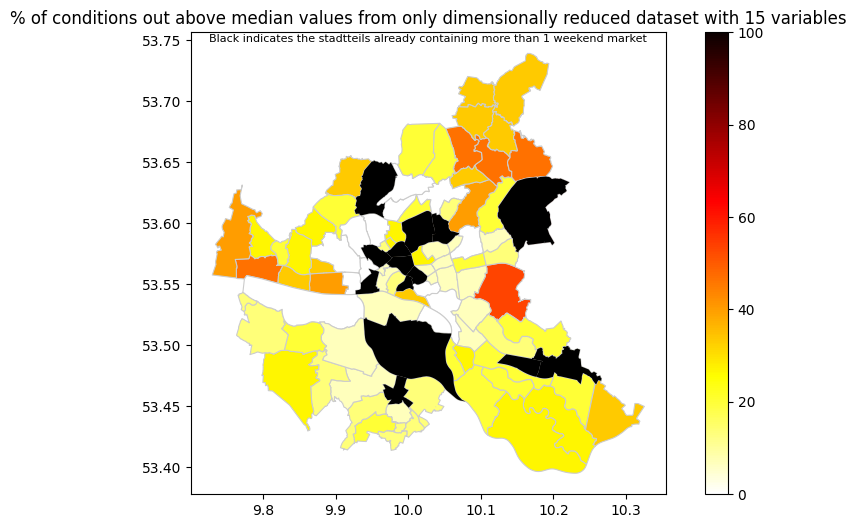

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = '/Users/asthanashivanshi1992/project-version-2/Data/Shapefile_Final/Shapefile_Hamburg_final.shp'
gdf = gpd.read_file(shapefile_path)

# Merge shapefile with df_75 based on stadtteils column
merged_gdf = gdf.merge(merged_df[['Stadtteils', 'Exceed_Percentage_75th for PCA variables']], left_on='stadtteil', right_on='Stadtteils')

# List of stadtteils to color black
black_stadtteils = ['Hamburg-Altstadt', 'St. Georg', 'Wilhelmsburg', 'Altona-Altstadt', 'Eimsbüttel',
                    'Rotherbaum', 'Harvestehude', 'Niendorf', 'Winterhude', 'Barmbek-Nord', 
                    'Rahlstedt', 'Bergedorf', 'Neuallermöhe', 'Harburg']

# Plot the 'Exceed_Percentage_75th for PCA variables' column values matched with the shapefile stadtteils
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='Exceed_Percentage_75th for PCA variables', cmap='hot_r', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=0,vmax=100,legend=True)

# Color specific stadtteils black
for stadtteil in black_stadtteils:
    merged_gdf[merged_gdf['Stadtteils'] == stadtteil].plot(ax=ax, color='black')

ax.set_title('% of conditions out above median values from only dimensionally reduced dataset with 15 variables')
ax.text(0.5, 0.98, 'Black indicates the stadtteils already containing more than 1 weekend market', ha='center', fontsize=8, transform=ax.transAxes)
plt.show()
